# Purpose of the Project

The sinking of the Titanic is one of the most infamous shipwrecks in history. The purpose of this project is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The dataset we will be using throughout this project can be found on Kaggle: https://www.kaggle.com/c/titanic/data

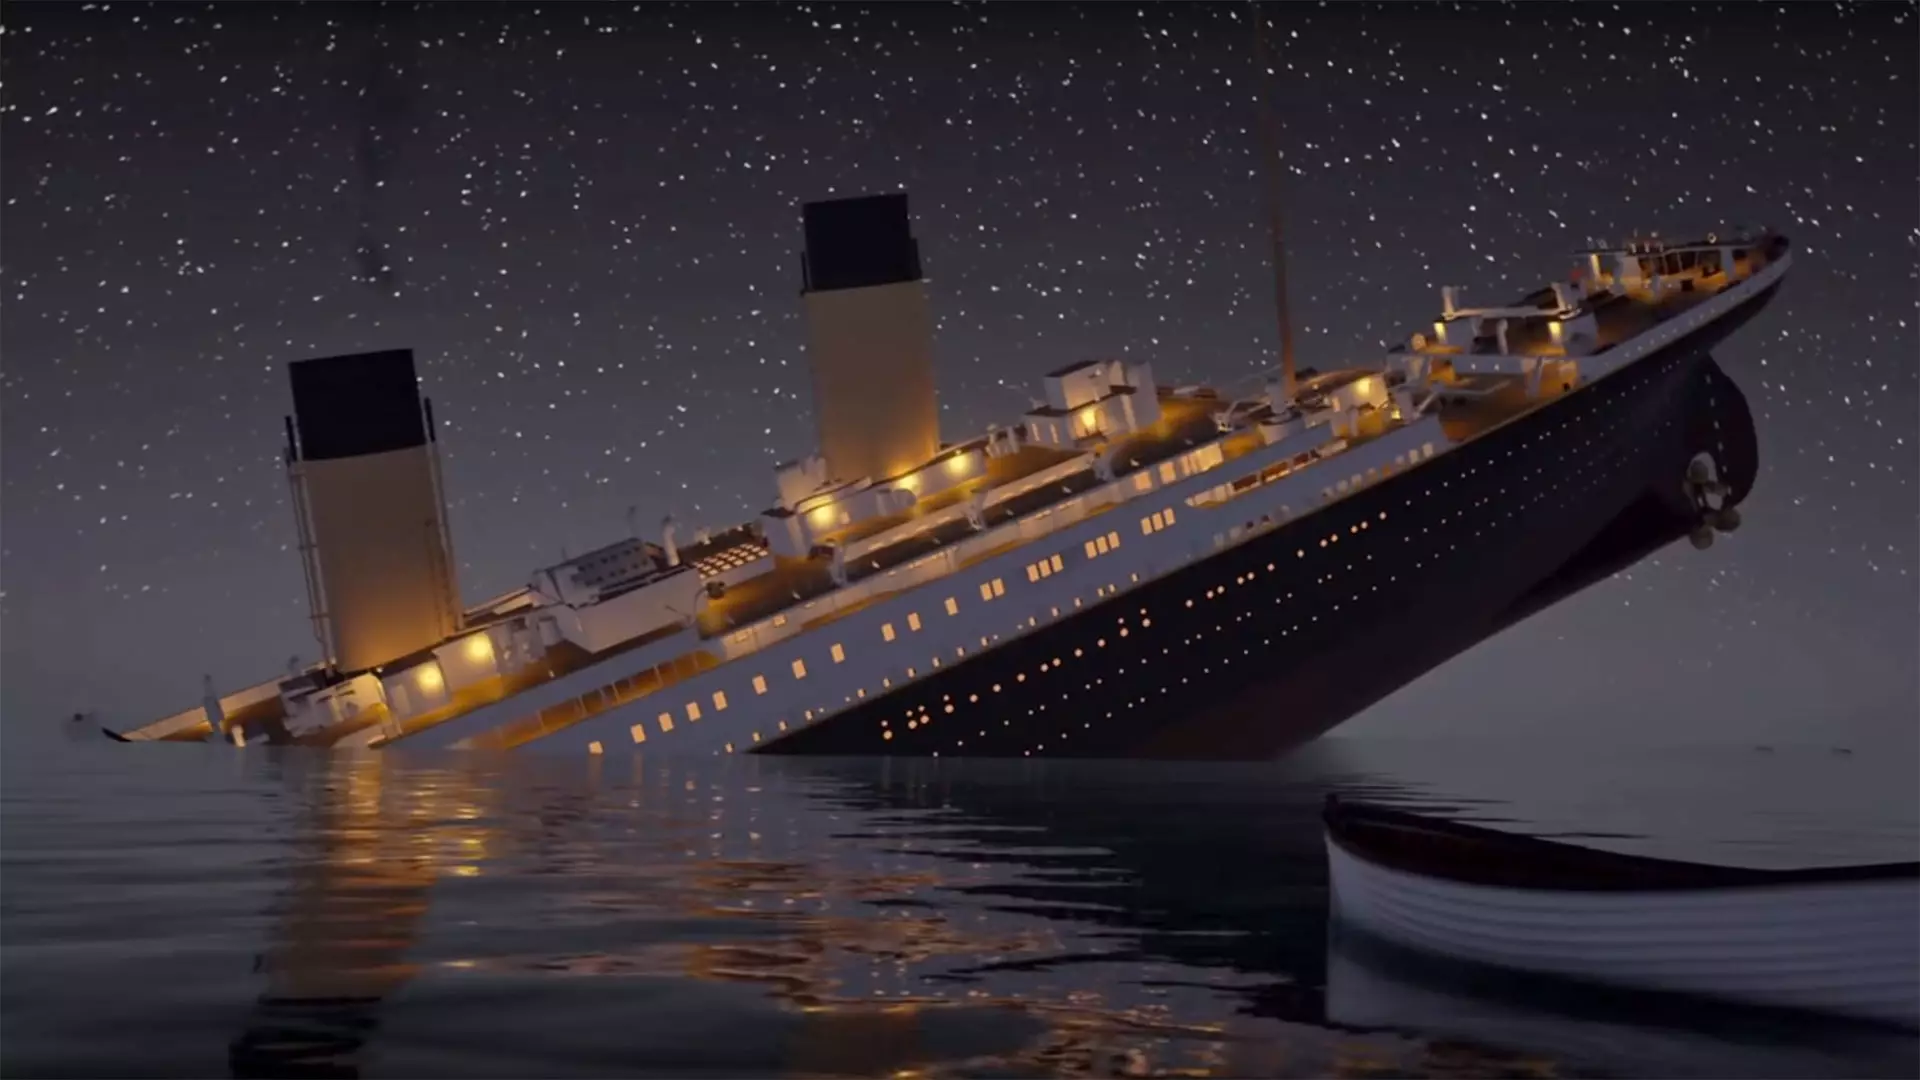

# Importing and Installing the Libraries

Importing and installing the libraries we will be using throughout this project.

In [1]:
# mathematical libraries
import numpy as np
import pandas as pd

# visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# data manipulation libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# libraries for building a model
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# we will be filtering the warnings for a cleaner looking notebook
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# installing xgboost library
import sys
!{sys.executable} -m pip install xgboost

# Importing the Datasets

Installing the dataset split into two parts: train and test.

In [2]:
train = pd.read_csv(r'C:\Users\ipkgu\Desktop\Bootcamp\Practice\train.csv')
test = pd.read_csv(r'C:\Users\ipkgu\Desktop\Bootcamp\Practice\test.csv')

# Exploratory Data Analysis

Getting to know the data by simple examination and visualization.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


891 x 12, 7 numerical, 5 object type columns.

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


418 x 11, 6 numerical, 5 object type columns.

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [9]:
train.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We observe a lot of missing values for Cabin and Age columns. Only 2 missing values for Embarked column.

In [10]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Similarly, a lot of missing values for Cabin and Age columns. Only 1 missing value for Fare column.

<AxesSubplot:>

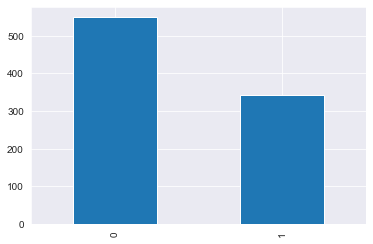

In [11]:
sns.set_style('darkgrid')
train['Survived'].value_counts().plot(kind='bar')

In [12]:
# checking the columns we can use for visual comparison that have less than 10 unique values
for col in train.columns:
    if train[col].nunique() < 10:
        print(col)

Survived
Pclass
Sex
SibSp
Parch
Embarked


In [13]:
# a general function for feature comparison
def feat_comp(col):
    surv_count = train[train['Survived']==1][col].value_counts()
    dead_count = train[train['Survived']==0][col].value_counts()
    surv_dead = pd.DataFrame([surv_count,dead_count])
    surv_dead.index = ['Survivor', 'Dead']
    return surv_dead

# survival/death ratios for each column data
Pclassdf = feat_comp('Pclass')
Sexdf = feat_comp('Sex')
SibSpdf = feat_comp('SibSp')
Parchdf = feat_comp('Parch')
Embarkeddf = feat_comp('Embarked')

<AxesSubplot:>

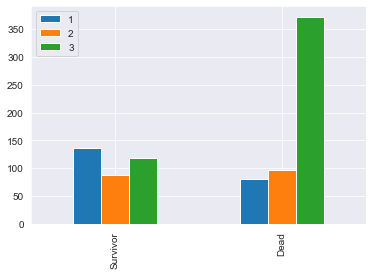

In [14]:
Pclassdf.plot(kind='bar')

Noticable difference in survival rate between 3rd class and other classes.

<AxesSubplot:>

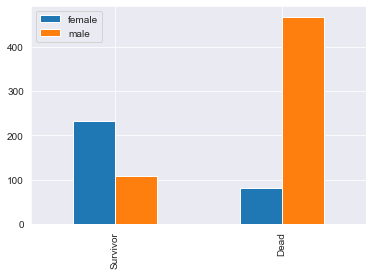

In [15]:
Sexdf.plot(kind='bar')

Females are more likely to survive than males.

<AxesSubplot:>

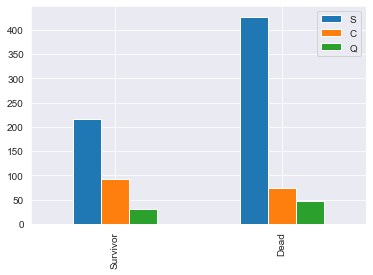

In [16]:
Embarkeddf.plot(kind='bar')

There might be a correlation between Embarked data and the target data, we will return to this later.

<AxesSubplot:>

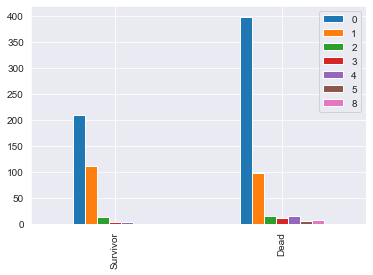

In [17]:
SibSpdf.plot(kind='bar')

People with siblings or spouses are more likely to survive.

<AxesSubplot:>

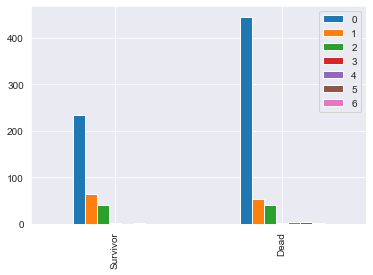

In [18]:
Parchdf.plot(kind='bar')

People further down the family relation tree are slightly less likely to survive.

# Feature Engineering

Transforming categorical features to numerical features and filling the missing values in our data.

In [19]:
train['Embarked'].isna().sum()

2

Since we only have 2 missing values for Embarked in the train data, we will fill it with the most frequent value of the column.

In [20]:
imp_enc = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train['Embarked']=imp_enc.fit_transform(train['Embarked'].values.reshape(-1,1))

In [21]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
# encoding Embarked to get numerical data that we can use later
ord_enc = OrdinalEncoder()
train['Embarked'] = ord_enc.fit_transform(train['Embarked'].values.reshape(-1,1))
test['Embarked'] = ord_enc.fit_transform(test['Embarked'].values.reshape(-1,1))

train['Embarked'].value_counts()

2.0    646
0.0    168
1.0     77
Name: Embarked, dtype: int64

In [23]:
test['Fare'].isna().sum()

1

Since we only have 1 missing value for Fare in the test data, we will fill it with the most frequent value of the column.

In [24]:
test['Fare']=imp_enc.fit_transform(test['Fare'].values.reshape(-1,1))

In [25]:
test['Fare'].isna().sum()

0

In [26]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
# encoding Sex to get numerical data that we can use later
train['Sex'] = ord_enc.fit_transform(train['Sex'].values.reshape(-1,1))
test['Sex'] = ord_enc.transform(test['Sex'].values.reshape(-1,1))

In [28]:
train['Sex'].value_counts()

1.0    577
0.0    314
Name: Sex, dtype: int64

In [29]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [30]:
# a function to get the identity part of the Name string such as Mr., Mrs. etc.
def get_identity(name):
    return name.split(',')[1].split('.')[0].strip(' ')

# adding an Idenitity column to both train and test data
train['Identity'] = train['Name'].apply(lambda x: get_identity(x))
test['Identity'] = test['Name'].apply(lambda x: get_identity(x))

In [31]:
train['Identity'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Ms                1
Sir               1
Capt              1
Jonkheer          1
Lady              1
Don               1
Mme               1
Name: Identity, dtype: int64

In [32]:
test['Identity'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Identity, dtype: int64

We will bundle the less frequent Identity data together and call it 'Others' for both datasets.

In [33]:
train.loc[train["Identity"].isin(['Dr','Rev','Major','Mlle','Col','Ms','Sir','Lady','Don','Capt','Jonkheer','Mme','the Countess','Dona']), 'Identity'] = 'Others'
test.loc[test["Identity"].isin(['Dr','Rev','Major','Mlle','Col','Ms','Sir','Lady','Don','Capt','Jonkheer','Mme','the Countess','Dona']), 'Identity'] = 'Others'

In [34]:
train['Identity'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Identity, dtype: int64

In [35]:
# encoding Identity values so we can use them later
train['Identity'] = ord_enc.fit_transform(train['Identity'].values.reshape(-1,1))

In [36]:
train['Identity'].value_counts()

2.0    517
1.0    182
3.0    125
0.0     40
4.0     27
Name: Identity, dtype: int64

In [37]:
# doing the same encoding to the test data
test['Identity'] = ord_enc.fit_transform(test['Identity'].values.reshape(-1,1))

In [38]:
test['Identity'].value_counts()

2.0    240
1.0     78
3.0     72
0.0     21
4.0      7
Name: Identity, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

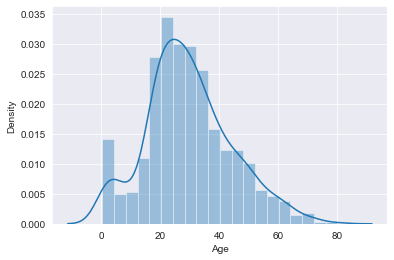

In [39]:
sns.distplot(train['Age'])

The Age column has a right-skewed distribution. We will use median value to fill the missing values in the column.

In [40]:
# filling the missing values with the median value of the column
train['Age'].fillna(train.groupby('Identity')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Identity')['Age'].transform('median'), inplace=True)

# Outlier Elimination

To get the most out of our model, we will find and handle possible outliers in our dataset.

<AxesSubplot:>

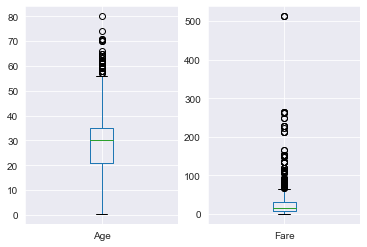

In [41]:
plt.subplot(1,2,1)
train.boxplot(column='Age')
plt.subplot(1,2,2)
train.boxplot(column='Fare')

Age and Fare columns have many outliers. however, the range of outliers is much higher for Fare than Age.

In [42]:
# handling outliers by flooring and capping

q1 = train['Fare'].quantile(0.25)
q3 = train['Fare'].quantile(0.75)
iqr = q3-q1
ww = 1.5
lw = q1 - (ww*iqr)
uw = q3 + (ww*iqr)
train['Fare'] = np.where(train['Fare']>uw,uw,
                         np.where(train['Fare']<lw,lw,train['Fare']))

q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
ww = 1.5
lw = q1 - (ww*iqr)
uw = q3 + (ww*iqr)
train['Age'] = np.where(train['Age']>uw,uw,
                        np.where(train['Age']<lw,lw,train['Age']))

<AxesSubplot:>

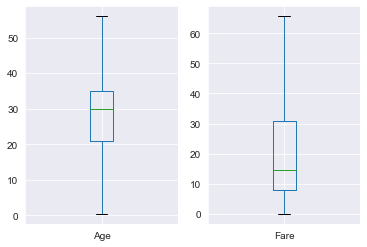

In [43]:
plt.subplot(1,2,1)
train.boxplot(column='Age')
plt.subplot(1,2,2)
train.boxplot(column='Fare')

No more outliers in both column datas.

In [44]:
# dropping the columns we won't be using from both datasets. even though we encoded Embarked column in the beginning, I decided
# to drop it since I couldn't think of a possible relation between the port that passengers got onto the ship from and the 
# survival rate.

train.drop(['Embarked', 'PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
test.drop(['Embarked', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [45]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Identity
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,65.6344,3.0
2,1,3,0.0,26.0,0,0,7.9250,1.0
3,1,1,0.0,35.0,1,0,53.1000,3.0
4,0,3,1.0,35.0,0,0,8.0500,2.0


In [46]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Identity
0,892,3,1.0,34.5,0,0,7.8292,2.0
1,893,3,0.0,47.0,1,0,7.0000,3.0
2,894,2,1.0,62.0,0,0,9.6875,2.0
3,895,3,1.0,27.0,0,0,8.6625,2.0
4,896,3,0.0,22.0,1,1,12.2875,3.0


# Model Evaluation

Trying out different models to find out the most effective one for our dataset.

In [47]:
# setting the target value and dropping it from the train data
y = train['Survived']
X = train.drop(['Survived'], axis=1)

# train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [48]:
# a function to get accuracy cross-validation score for four of the models we will be trying on our data
def get_score(model, n=0):
    global clf
    
    if model == 'rf':
        clf = RandomForestClassifier(n,random_state=0)
    elif model == 'knn':
        clf = KNeighborsClassifier(n)
    elif model == 'lr':
        clf = LogisticRegression()
    elif model == 'dt':
        clf = DecisionTreeClassifier(random_state=0)
    
    scores = cross_val_score(clf, X_train, y_train,
                                  cv=k_fold,
                                  scoring='accuracy')

    return(scores.mean())

## Logistic Regression

In [49]:
# calculating accuracy for Logistic Regression
lr_results = get_score('lr')
print(round((lr_results)*100, 2))

79.23


## Random Forest

In [50]:
# calculating accuracy for Random Forest
n_estimators = np.arange(10,50,5) # the range we will be choosing our n values from
rf_results = {}
vals = [get_score('rf', n_estimators) for n_estimators in n_estimators]
rf_results = dict(zip(n_estimators, vals))

print(rf_results)

{10: 0.8048317683881064, 15: 0.7964006259780907, 20: 0.7964397496087636, 25: 0.7950508607198749, 30: 0.8034820031298905, 35: 0.8105242566510172, 40: 0.8105242566510172, 45: 0.8091158059467919}


In [51]:
rf = RandomForestClassifier(n_estimators=20, random_state=0)
print(round(rf_results[35]*100, 2))

81.05


## Decision Tree

In [52]:
# calculating accuracy for Decision Tree
dt_results = get_score('dt')
print(round((dt_results)*100, 2))

74.87


## KNN

In [53]:
# calculating accuracy for KNN
knn_results = {}
vals = [get_score('knn', n_estimators) for n_estimators in n_estimators]
knn_results = dict(zip(n_estimators, vals))
print(knn_results)

{10: 0.7107785602503912, 15: 0.6995109546165884, 20: 0.6953051643192488, 25: 0.6995109546165884, 30: 0.6966940532081377, 35: 0.6671948356807511, 40: 0.6714593114241001, 45: 0.6728482003129891}


In [54]:
knn = KNeighborsClassifier()
knns = round(knn_results[10]*100, 2)
print(knns)

71.08


## XGB Classifier

In [55]:
# calculating accuracy for XGB Classifier
xgb = XGBClassifier(n_estimators=30)
scores = cross_val_score(xgb, X_train, y_train,
                                  cv=k_fold,
                                  scoring='accuracy')
scores.mean()

[04:33:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:33:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:33:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:33:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.826056338028169

# Choosing Model and Prediction

Comparing the accuracy scores of the models we tested in the previous section and choosing the best performing model for our project.

In [56]:
# since the highest accuracy was performed by XGB Classifier, we will be using it as our model
estimator = XGBClassifier(
    objective= 'binary:logistic',
    seed=42
)

In [57]:
# using GridSearchCV to tune our parameters
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(10, 50, 5),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 5,
    cv = k_fold,
    verbose=True
)

In [58]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    6.8s
[Parallel(n_jobs=5)]: Done 335 tasks      | elapsed:   11.8s
[Parallel(n_jobs=5)]: Done 835 tasks      | elapsed:   22.0s
[Parallel(n_jobs=5)]: Done 1535 tasks      | elapsed:   36.3s
[Parallel(n_jobs=5)]: Done 1911 out of 1920 | elapsed:   45.5s remaining:    0.1s


[04:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=5)]: Done 1920 out of 1920 | elapsed:   45.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mono...s=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                          

In [59]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [60]:
# choosing best performing parameters for our model, fitting train data and getting validation prediction
model = grid_search.best_estimator_
model.fit(X_train, y_train)
preds = model.predict(X_valid)

# getting accuracy score and MSE
scores = cross_val_score(model, X_train, y_train,
                                  cv=k_fold,
                                  scoring='accuracy')

print('Accuracy:', scores.mean())
print('MSE:', mean_squared_error(y_valid, preds))

[04:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:33:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# Saving Prediction Results

Getting test data predictions and saving them in Kaggle's format.

In [61]:
test_data = test.drop("PassengerId", axis=1).copy()
test_preds = model.predict(test_data)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": test_preds
    })

submission.to_csv('submission.csv', index=False)

In [62]:
# previewing our final data
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
